# Upper Confidence Bound (UCB)

## Importing the libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Part 6 - Reinforcement Learning/1. Upper Confidence Bound/Copy of Ads_CTR_Optimisation.csv')
# Ads_CTR_Optimisation (CTR means click through rate)

## Implementing UCB

In [24]:
import math
N = 500 # number of users
d = 10 # we have 10 types of ads
ads_selected = []
numbers_of_selections = [0] * d
sum_of_rewards = [0] * d
total_reward = 0

for n in range(0,N):
  ad = 0
  max_upper_bound = 0

  for i in range(0,d):
    if numbers_of_selections[i] > 0 :
      average_reward = sum_of_rewards[i] / numbers_of_selections[i]
      delta_interval = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_interval
    else :
      upper_bound = 1e400
    if (upper_bound > max_upper_bound) :
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n,ad]
  sum_of_rewards[ad] = sum_of_rewards[ad] + reward
  total_reward = total_reward + reward

## Visualising the results

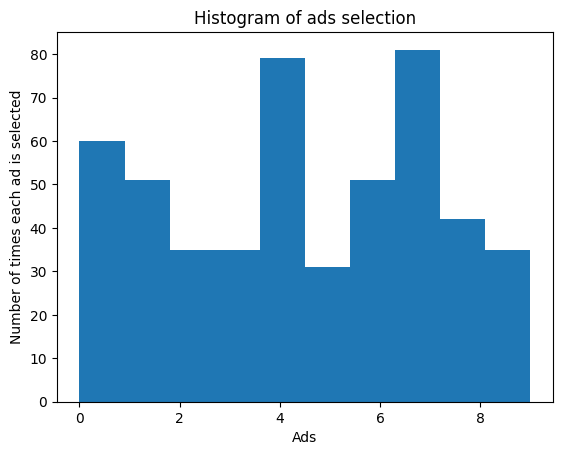

In [25]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad is selected')
plt.show()